In [4]:
%load_ext dotenv
%dotenv ../../05_src/.secrets

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [21]:
import os
from openai import OpenAI
import pandas as pd
import numpy as np

In [7]:
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
if not OPENAI_API_KEY:
    raise ValueError("OPENAI_API_KEY not found in environment variables")
else:
    client = OpenAI(api_key = OPENAI_API_KEY)

In [8]:
def get_embedding(text, model="text-embedding-ada-002"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding

In [26]:
documents = [
    # Freedom
    "Freedom consists not in doing what we like, but in having the right to do what we ought.",
    "Those who deny freedom to others deserve it not for themselves.",
    "Liberty, when it begins to take root, is a plant of rapid growth.",
    "Freedom lies in being bold.",
    "Is freedom anything else than the right to live as we wish?",
    "I am no bird and no net ensnares me: I am a free human being with an independent will.",
    "The secret to happiness is freedom... And the secret to freedom is courage."
    "Freedom is the oxygen of the soul.", 
    "Life without liberty is like a body without spirit."
    # Friendship
    "There is nothing on this earth more to be prized than true friendship.",
    "There are no strangers here; Only friends you haven’t yet met.",
    "Friendship is the only cement that will ever hold the world together.",
    "A true friend is someone who is there for you when he'd rather be anywhere else.",
    "Friendship is the golden thread that ties the heart of all the world.", 
    "Your friend is the man who knows all about you and still likes you.",
    "A single rose can be my garden... a single friend, my world."
]

In [27]:
embeddings = [get_embedding(doc) for doc in documents]

In [28]:
embeddings

[[-0.00823751650750637,
  -0.032303497195243835,
  -0.020851796492934227,
  -0.028100810945034027,
  -0.010009359568357468,
  0.018041715025901794,
  -0.03061247617006302,
  0.0017796143656596541,
  0.017407581210136414,
  0.00023100015823729336,
  0.03304953873157501,
  0.02161026932299137,
  0.008504847064614296,
  -0.015517615713179111,
  0.000917006516829133,
  0.01305568590760231,
  0.03827181085944176,
  -0.012583195231854916,
  0.022940706461668015,
  -0.025464804843068123,
  0.01320489402860403,
  -0.00032794641447253525,
  -0.010519152507185936,
  -0.004923858679831028,
  0.01334166806191206,
  -0.014808878302574158,
  0.022393610328435898,
  -0.03832154721021652,
  0.028473829850554466,
  -0.03140825033187866,
  0.023873254656791687,
  -0.0014539993135258555,
  -0.022468214854598045,
  -0.012527242302894592,
  -0.04319567233324051,
  -0.01838986761868,
  -0.022828800603747368,
  -0.001209205249324441,
  -0.0007176742074079812,
  -0.023786216974258423,
  0.013938499614596367,


In [29]:
embeddings_array = np.array(embeddings)
embeddings_array

array([[-0.00823752, -0.0323035 , -0.0208518 , ...,  0.0018853 ,
         0.01306812, -0.02164757],
       [-0.00014545, -0.03022516, -0.01327647, ..., -0.0119347 ,
         0.00729307,  0.00624983],
       [ 0.00090821, -0.02177122, -0.00630731, ..., -0.00175491,
        -0.01555458, -0.02314407],
       ...,
       [ 0.00630443, -0.00464687,  0.00900904, ..., -0.03206309,
         0.00444758, -0.03631454],
       [ 0.00494836,  0.00557723,  0.03836728, ..., -0.00207399,
        -0.00044187, -0.02855948],
       [-0.00483687, -0.01136728,  0.0208598 , ..., -0.00959251,
        -0.00148184, -0.03227082]], shape=(14, 1536))

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced_embeddings = pca.fit_transform(embeddings_array)

In [31]:
reduced_embeddings

array([[ 2.85161941e-01, -6.03955901e-02],
       [ 2.22770736e-01, -1.17181434e-01],
       [ 1.56506126e-01,  6.87030925e-02],
       [ 2.12339501e-01, -4.90732783e-02],
       [ 2.79320763e-01, -2.73590614e-03],
       [ 1.17749137e-01,  4.82787887e-02],
       [ 1.15369303e-01,  9.91934671e-02],
       [ 2.98254206e-05,  8.84831836e-02],
       [-2.02241030e-01, -4.61419641e-02],
       [-2.54077505e-01,  1.41761310e-01],
       [-2.10342499e-01, -2.34043968e-01],
       [-2.39928040e-01,  1.94610621e-01],
       [-2.79961088e-01, -3.12322132e-01],
       [-2.02697170e-01,  1.80863809e-01]])

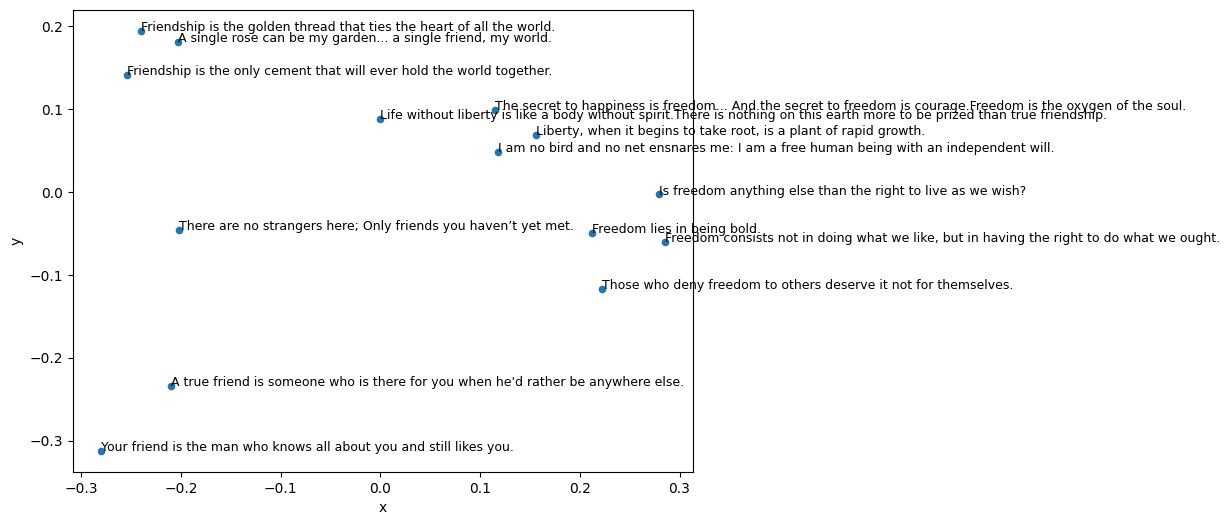

In [32]:
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"]).assign(lables = documents)
ax = df.plot(kind='scatter', x='x', y='y', figsize=(8, 6))
for i, row in df.iterrows():
    ax.text(row['x'], row['y'], row['lables'], fontsize=9)